In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
pd.set_option('display.width',200)
pd.set_option('display.max_colwidth',100)

## prepare dataset

In [2]:
twitter1 = pd.read_csv("trayvontweets/Trayvon Tweets 2012.csv",encoding = "latin1", index_col = 0)

/Users/ycr/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/ycr/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
twitter2 = pd.read_csv("trayvontweets/Trayvon Tweets 2013.csv",encoding = "latin1", index_col = 0)

In [4]:
twitter = pd.concat([twitter1,twitter2],ignore_index=True)

In [5]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097150 entries, 0 to 2097149
Data columns (total 20 columns):
id                      int64
message_id              int64
user_handle             object
orig_user_id            int64
orig_user_handle        object
topsy_type              object
orig_date_posted_gmt    float64
date_posted_gmt         float64
message                 object
orig_user_location      object
coordinates             object
tweet_location          object
longitude               float64
latitude                float64
created_at_gmt          float64
seconds_after_event     float64
FIPS                    object
County                  object
City                    object
State                   object
dtypes: float64(6), int64(3), object(11)
memory usage: 320.0+ MB


In [6]:
def date(dates):
    delta=datetime.timedelta(days=dates)
    today=datetime.datetime.strptime('1899-12-30 00:00:00','%Y-%m-%d %H:%M:%S')+delta
    return datetime.datetime.strftime(today,'%Y-%m-%d %H:%M:%S')

In [7]:
data_msg_time = twitter.loc[twitter['message'].isnull() == False,['date_posted_gmt','message']]
data_msg_time = data_msg_time.sample(n = 100000)
data_msg_time = data_msg_time.reset_index(drop = True)
data_msg_time['date_posted_gmt'] = data_msg_time['date_posted_gmt'].apply(lambda x: date(x))

###  function add_ymdw: add year month day  week columns for original dataframe 


In [8]:
def add_ymdw(df):
    df['date']=pd.to_datetime(df['date_posted_gmt'])

    df['year']=df['date'].apply(lambda x: x.year)

    df['month']=df['date'].apply(lambda x: x.month)

    df['day']=df['date'].apply(lambda x: x.day)
    
    def getweek(a,b,c):
        return datetime.date(a,b,c).isocalendar()[1]
    df['week'] = df.apply(lambda x: getweek(x['year'], x['month'],x['day']), axis=1)

    return df

In [9]:
data_msg_time=add_ymdw(data_msg_time)

In [10]:
data_msg_time.head()

,date_posted_gmt,message,date,year,month,day,week
0,2013-07-19 15:38:46,Political Animal: Will Ghost of Trayvon Haunt Rick Scott? http://t.co/AyENsR626Y #p2 #topprog,2013-07-19 15:38:46,2013,7,19,29
1,2012-03-26 21:40:35,"@SybrinaFulton YES, GOD IS IN CONTROL! Each time I see u speak, I cant hold back tears. My son i...",2012-03-26 21:40:35,2012,3,26,13
2,2012-07-27 02:39:59,Happy Birthday Trayvon Martin :),2012-07-27 02:39:59,2012,7,27,30
3,2013-11-04 19:20:45,"Imma say it and imma end mine: If George Zimmerman had Jonathan Martin's courage, Trayvon Martin...",2013-11-04 19:20:45,2013,11,4,45
4,2013-11-18 19:16:53,George Zimmerman gets arrested. Again. http://t.co/yg3rlMFcrc,2013-11-18 19:16:53,2013,11,18,47


### split dataset according to their year
you can get 3 dataframes finally

In [11]:
def split_year(df):
    df2012=df[df['year']==2012]
    df2013=df[df['year']==2013]
    df2014=df[df['year']==2014]
    return df2012,df2013,df2014

In [12]:
data_msg_time2012,data_msg_time2013,data_msg_time2014=split_year(data_msg_time)
data_msg_time2012.head()

,date_posted_gmt,message,date,year,month,day,week
1,2012-03-26 21:40:35,"@SybrinaFulton YES, GOD IS IN CONTROL! Each time I see u speak, I cant hold back tears. My son i...",2012-03-26 21:40:35,2012,3,26,13
2,2012-07-27 02:39:59,Happy Birthday Trayvon Martin :),2012-07-27 02:39:59,2012,7,27,30
5,2012-04-04 16:02:00,RT @Milly_Esquire: Trayvon Martin wasn't the 1st & won't be the last....,2012-04-04 16:02:00,2012,4,4,14
6,2012-03-29 02:23:15,how is Plies gone make a tribute song to Trayvon Martin if 95% of his other songs are about kill...,2012-03-29 02:23:15,2012,3,29,13
8,2012-03-29 16:54:18,MT @thinkprogress INFOGRAPHIC: George ZimmermanÛªs story vs. surveillance images: http://t.co/l...,2012-03-29 16:54:18,2012,3,29,13


In [13]:
event_date_2012 = '20120226'
event_date_2013 = '20130713'
data_msg_time2012['days_from_event'] = data_msg_time2012.apply(lambda x: (x['date'] - pd.to_datetime(event_date_2012)).days, axis=1)
data_msg_time2013['days_from_event'] = data_msg_time2013.apply(lambda x: (x['date'] - pd.to_datetime(event_date_2013)).days, axis=1)
data_msg_time2014['days_from_event'] = data_msg_time2014.apply(lambda x: (x['date'] - pd.to_datetime(event_date_2013)).days, axis=1)

/Users/ycr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ycr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/ycr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [14]:
data_msg_time2012['date'] = data_msg_time2012.apply(lambda x: (x['date'].date()), axis=1)
data_msg_time2013['date'] = data_msg_time2013.apply(lambda x: (x['date'].date()), axis=1)
data_msg_time2014['date'] = data_msg_time2014.apply(lambda x: (x['date'].date()), axis=1)

/Users/ycr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/ycr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ycr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

### preprocess message

In [15]:
#change all to lower case for future regex
data_msg_time2012['message'] = data_msg_time2012['message'].str.lower()
data_msg_time2013['message'] = data_msg_time2013['message'].str.lower()
data_msg_time2014['message'] = data_msg_time2014['message'].str.lower()

/Users/ycr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ycr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ycr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

## detect emotions

### import LIWC dictionary

In [16]:
file = open("LIWC Dictionary/LIWC_dic.txt","r")

LIWC = file.readlines()
LIWC_dict = {}
for line in LIWC:
    line = line.split(',')
    category = line[0]
    words = line[1:]
    words[0] = words[0][1:]
    words[-1] = words[-1][:-2]
    LIWC_dict[category] = words

In [17]:
LIWC_dict.keys()

dict_keys(['Function', 'Pronoun', 'Ppron', 'I', 'We', 'You', 'SheHe', 'They', 'Ipron', 'Article', 'Prep', 'Auxverb', 'Adverb', 'Conj', 'Negate', 'Verb', 'Adj', 'Compare', 'Interrog', 'Number', 'Quant', 'Affect', 'Posemo', 'Negemo', 'Anx', 'Anger', 'Sad', 'Social', 'Family', 'Friend', 'Female', 'Male', 'CogProc', 'Insight', 'Cause', 'Discrep', 'Tentat', 'Certain', 'Differ', 'Percept', 'See', 'Hear', 'Feel', 'Bio', 'Body', 'Health', 'Sexual', 'Ingest', 'Drives', 'Affiliation', 'Achieve', 'Power', 'Reward', 'Risk', 'FocusPast', 'FocusPresent', 'FocusFuture', 'Relativ', 'Motion', 'Space', 'Time', 'Work', 'Leisure', 'Home', 'Money', 'Relig', 'Death', 'Informal', 'Swear', 'Netspeak', 'Assent', 'Nonflu', 'Filler', 'Stress'])

### Adjust LIWC dictionary

In [18]:
posemo = LIWC_dict['Posemo']
for i in range(len(posemo)):
    if posemo[i][-1] == '*':
        posemo[i] = r'\b' + posemo[i][:-1]
    else:
        posemo[i] = r'\b' + posemo[i] + r'\b'
posemo[0] = '\(:'
posemo[5] = ':\)'
reg_posemo = "|".join(posemo)
reg_posemo = re.compile(reg_posemo)

In [19]:
negemo = LIWC_dict['Negemo']
for i in range(len(negemo)):
    if negemo[i][-1] == '*':
        negemo[i] = r'\b' + negemo[i][:-1]
    else:
        negemo[i] = r'\b' + negemo[i] + r'\b'
negemo[0] = '\):'
negemo[5] = ':\('
reg_negemo = "|".join(negemo)
reg_negemo = re.compile(reg_negemo)

In [20]:
anx = LIWC_dict['Anx']
for i in range(len(anx)):
    if anx[i][-1] == '*':
        anx[i] = r'\b' + anx[i][:-1]
    else:
        anx[i] = r'\b' + anx[i] + r'\b'
reg_anx = "|".join(anx)
reg_anx = re.compile(reg_anx)

In [21]:
anger = LIWC_dict['Anger']
for i in range(len(anger)):
    if anger[i][-1] == '*':
        anger[i] = r'\b' + anger[i][:-1]
    else:
        anger[i] = r'\b' + anger[i] + r'\b'
reg_anger = "|".join(anger)
reg_anger = re.compile(reg_anger)

In [22]:
sad = LIWC_dict['Sad']
for i in range(len(sad)):
    if sad[i][-1] == '*':
        sad[i] = r'\b' + sad[i][:-1]
    else:
        sad[i] = r'\b' + sad[i] + r'\b'
reg_sad = "|".join(sad)
reg_sad = re.compile(reg_sad)

In [23]:
stress = LIWC_dict['Stress']
for i in range(len(stress)):
    if stress[i][-1] == '*':
        stress[i] = r'\b' + stress[i][:-1]
    else:
        stress[i] = r'\b' + stress[i] + r'\b'
reg_stress = "|".join(stress)
reg_stress = re.compile(reg_stress)

In [24]:
reg_posemo.search("humorabc")

<re.Match object; span=(0, 5), match='humor'>

In [25]:
reg_posemo.search("happyhhh")

### function to check whether the message contains the category or not

In [26]:
import re
from functools import partial
from collections import Counter
import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [27]:
def replace(word, pos=None):
    """ Creates a set of all antonyms for the word and if there is only one antonym, it returns it """
    antonyms = set()
    for syn in wordnet.synsets(word, pos=pos):
        for lemma in syn.lemmas():
            for antonym in lemma.antonyms():
                antonyms.add(antonym.name())
    if len(antonyms) == 1:
        return antonyms.pop()
    else:
        return None

def replaceNegations(text):
    """ Finds "not" and antonym for the next word and if found, replaces not and the next word with the antonym """
    i, l = 0, len(text)
    words = []
    while i < l:
        word = text[i]
        if word == 'not' and i+1 < l:
            ant = replace(text[i+1])
            if ant:
                words.append(ant)
                i += 2
                continue

        words.append(word)
        i += 1
    return words

In [28]:
def check_category(s,category,dic):
    '''
    s type: string of list
    category type: list of string 
    '''
    s = replaceNegations(s)
    if category == 'Posemo':
        if len(list(filter(reg_posemo.search,s)))>=1:
            return category
    elif category == 'Negemo':
        if len(list(filter(reg_negemo.search,s)))>=1:
            return category
    elif category == 'Anx':
        if len(list(filter(reg_anx.search,s)))>=1:
            return category
    elif category == 'Anger':
        if len(list(filter(reg_anger.search,s)))>=1:
            return category
    elif category == 'Sad':
        if len(list(filter(reg_sad.search,s)))>=1:
            return category
    elif category == 'Stress':
        if len(list(filter(reg_stress.search,s)))>=1:
            return category
    else:
        print("only valid for six category")
    return 'NA'

In [29]:
check_category(['stressed','happy'],'Anx',LIWC_dict)

'Anx'

In [30]:
check_category(['happy!!!'],'Anx',LIWC_dict)

'NA'

In [31]:
check_category(['afraid'],'Negemo',LIWC_dict)

'Negemo'

In [32]:
check_category(['confu'],'Negemo',LIWC_dict)

'NA'

### add_tag_col
- df:  dataframe 
- cate: list of emotion category
- dic: the dictionary stores all words belong to the category
e.g. here tag='Anx' means the message of the row contains anxiety words

In [33]:
def removePunctuations(text):
    """remove Punctuations"""
    text = re.sub("[\.\,\!\?\:\;\-\=\&\(\)\"]", " ", text)
    return text

In [34]:
def replaceAtUser(text):
    """ remove"@user" """
    text = re.sub('@[^\s]+','',text) 
    return text

In [35]:
def removeHashtagInFrontOfWord(text):
    """ Removes hastag in front of a word """
    text = re.sub(r'#([^\s]+)', r'\1', text)  #only remove# or remove all?
    return text

In [36]:
contraction_map = {}
with open('contractions.txt') as file:
    for line in file:
        (key,val)= line.rstrip().split(":")
        contraction_map[key] = val
        
def replaceContractions(word):
    """Remove contractions """
    if word in contraction_map.keys():
        return contraction_map[word].split()
    else:
        return word

In [37]:
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import MWETokenizer
def add_tag_col(df,cate,dic):
    tokenizer = TweetTokenizer()
    multi_tokenizer = MWETokenizer()
    multi_tokenizer.add_mwe(('b', 'l', 'm'))
    multi_tokenizer.add_mwe(('r', 'i', 'p'))
    for category in cate:
        df['token'] = df.apply(lambda x: replaceAtUser(x['message']),axis = 1)
        df['token'] = df.apply(lambda x: removeHashtagInFrontOfWord(x['token']),axis = 1)
        df['token'] = df.apply(lambda x: replaceContractions(x['token']),axis = 1)
        df['token'] = df.apply(lambda x: removePunctuations(x['token']),axis = 1)
        df['token'] = df.apply(lambda x: multi_tokenizer.tokenize(tokenizer.tokenize(x['token'])),axis = 1)
        df[category]=df.apply(lambda x: check_category(x['token'],category,dic),axis=1)
    return df

In [38]:
emotions = ['Sad','Anx','Anger','Negemo','Posemo','Stress']
data_msg_time2012=add_tag_col(data_msg_time2012,emotions,LIWC_dict)  
data_msg_time2012.head()

/Users/ycr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/ycr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/ycr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,date_posted_gmt,message,date,year,month,day,week,days_from_event,token,Sad,Anx,Anger,Negemo,Posemo,Stress
1,2012-03-26 21:40:35,"@sybrinafulton yes, god is in control! each time i see u speak, i cant hold back tears. my son i...",2012-03-26,2012,3,26,13,29,"[yes, god, is, in, control, each, time, i, see, u, speak, i, cant, hold, back, tears, my, son, i...",Sad,NA,NA,Negemo,NA,NA
2,2012-07-27 02:39:59,happy birthday trayvon martin :),2012-07-27,2012,7,27,30,152,"[happy, birthday, trayvon, martin]",NA,NA,NA,NA,Posemo,NA
5,2012-04-04 16:02:00,rt @milly_esquire: trayvon martin wasn't the 1st & won't be the last....,2012-04-04,2012,4,4,14,38,"[rt, trayvon, martin, wasn't, the, 1st, won't, be, the, last]",NA,NA,NA,NA,NA,NA
6,2012-03-29 02:23:15,how is plies gone make a tribute song to trayvon martin if 95% of his other songs are about kill...,2012-03-29,2012,3,29,13,32,"[how, is, plies, gone, make, a, tribute, song, to, trayvon, martin, if, 95, %, of, his, other, s...",NA,NA,Anger,Negemo,NA,NA
8,2012-03-29 16:54:18,mt @thinkprogress infographic: george zimmermanûªs story vs. surveillance images: http://t.co/l...,2012-03-29,2012,3,29,13,32,"[mt, infographic, george, zimmerman, , ûªs, story, vs, surveillance, images, http, /, /, t, co,...",NA,NA,NA,NA,NA,NA


In [39]:
data_msg_time2013=add_tag_col(data_msg_time2013,emotions,LIWC_dict)  
data_msg_time2013.head()

/Users/ycr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/ycr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/ycr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,date_posted_gmt,message,date,year,month,day,week,days_from_event,token,Sad,Anx,Anger,Negemo,Posemo,Stress
0,2013-07-19 15:38:46,political animal: will ghost of trayvon haunt rick scott? http://t.co/ayensr626y #p2 #topprog,2013-07-19,2013,7,19,29,6,"[political, animal, will, ghost, of, trayvon, haunt, rick, scott, http, /, /, t, co, /, ayensr, ...",NA,NA,NA,NA,NA,NA
3,2013-11-04 19:20:45,"imma say it and imma end mine: if george zimmerman had jonathan martin's courage, trayvon martin...",2013-11-04,2013,11,4,45,114,"[imma, say, it, and, imma, end, mine, if, george, zimmerman, had, jonathan, martin's, courage, t...",NA,NA,NA,NA,Posemo,NA
4,2013-11-18 19:16:53,george zimmerman gets arrested. again. http://t.co/yg3rlmfcrc,2013-11-18,2013,11,18,47,128,"[george, zimmerman, gets, arrested, again, http, /, /, t, co, /, yg3rlmfcrc]",NA,NA,NA,NA,NA,NA
7,2013-09-30 08:06:16,roundup: new trial granted in äóöwarning shotäó» case; zimmermanäó»s wife doubts... http://t.co/...,2013-09-30,2013,9,30,40,79,"[roundup, new, trial, granted, in, äóöwarning, shotäó, », case, zimmermanäó, », s, wife, doubts,...",NA,Anx,NA,Negemo,NA,NA
9,2013-07-14 00:50:14,#zimmerman this is just a distraction for all the obama scandals and the msm is following it to ...,2013-07-14,2013,7,14,28,1,"[zimmerman, this, is, just, a, distraction, for, all, the, obama, scandals, and, the, msm, is, f...",NA,NA,NA,NA,NA,NA


## Plot emotions in 2012 and 2013

In [40]:
df_all_week_2012 = data_msg_time2012.groupby('week')['message'].count()
df_all_week_2012

week
1        18
8        15
9        30
10       75
11      910
12    16032
13    11627
14     2418
15     5587
16     1422
17      958
18      384
19      362
20      983
21      304
22      438
23      274
24      507
25      418
26      221
27      550
28      241
29      768
30      252
31      134
32      146
33      173
34      105
35      286
36      112
37      145
38      152
39       69
40       89
41      108
42      196
43       98
44       93
45      131
46      117
47       77
48      136
49      255
50      109
51      123
52       85
Name: message, dtype: int64

Most of the data are from week 8. So we will plot from week 8.

In [41]:
df_all_week_2013 = data_msg_time2013.groupby('week')['message'].count()
df_all_week_2013

week
1       168
2        59
3       129
4       339
5       129
6       729
7       128
8       100
9       387
28    15071
29    15868
30     3757
31     1214
32      648
33      435
34      596
35      519
36      392
37      690
38      156
39      216
40      167
41      163
42       98
43      134
44      383
45      159
46      132
47     1009
48      264
49      184
50      266
51      297
52      160
Name: message, dtype: int64

Most of the data are from week 28 and there is a blank between week 10 to week 27. So we will plot from week 28.

### plot_count_trend function
- df: the dataframe contains at least **message,week, tag** cols

- cate: the category of emotion e.g. anxiety='anx

In [42]:
def plot_count_trend(df,category):
    df_category_week = pd.DataFrame()
    for cate in category:
        df_cate_week=df[df[cate]==cate].groupby('week')['message'].count()    
        df_cate_week = pd.DataFrame(df_cate_week)
        df_cate_week.columns = [cate]
        df_category_week = pd.concat([df_category_week,df_cate_week],axis = 1)
    return df_category_week

In [43]:
df_cate_week_2012 = plot_count_trend(data_msg_time2012.loc[data_msg_time2012['week']>=8],emotions)
df_cate_week_2013 = plot_count_trend(data_msg_time2013.loc[data_msg_time2013['week']>=28],emotions)

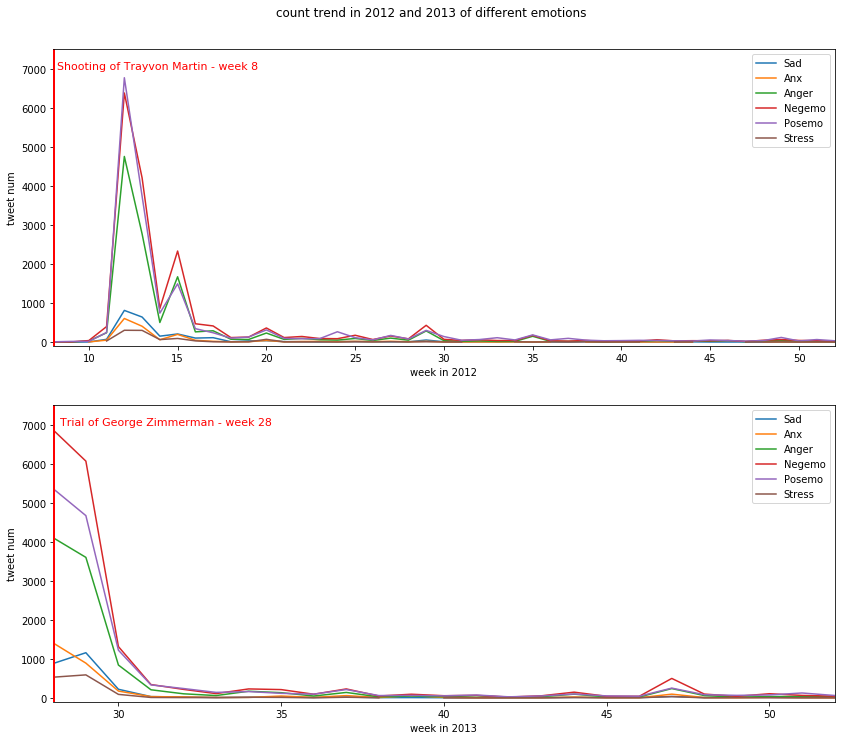

In [44]:
f,ax=plt.subplots(2,1,figsize=(14,12))
df_cate_week_2012.plot(ax=ax[0])
ax[0].axvline(x =8.01,color = 'r',linewidth = 2)
ax[0].set(xlabel='week in 2012',ylabel='tweet num')
ax[0].spines['left'].set_visible(False)
ax[0].text(x =8.2,y = 7000, s = "Shooting of Trayvon Martin - week 8",color = "r",fontsize = 11)
ax[0].set_ylim(-100,7500)
df_cate_week_2013.plot(ax=ax[1])
ax[1].axvline(x =28.01,color = 'r',linewidth = 2)
ax[1].set(xlabel='week in 2013',ylabel='tweet num')
ax[1].spines['left'].set_visible(False)
ax[1].text(x =28.2,y = 7000, s = "Trial of George Zimmerman - week 28",color = "r",fontsize = 11)
ax[1].set_ylim(-100,7500)
plt.suptitle("count trend in 2012 and 2013 of different emotions",y=0.93)
plt.savefig("count trend.png")

### plot_fraction_trend
- df: the dataframe contains at least **message,week,tag cols**
- cate: the category of emotion e.g. anxiety='anx
- title: graph title
- xlabel: graph xlabel

In [45]:
df_all_week_2012 = pd.DataFrame(df_all_week_2012)
df_cate_week_2012 = df_cate_week_2012.join(df_all_week_2012)
df_cate_week_2012 = df_cate_week_2012.fillna(0)

In [46]:
for cate in  emotions:
    df_cate_week_2012[cate] = df_cate_week_2012[cate]/df_cate_week_2012['message']*100
df_cate_week_2012 = df_cate_week_2012.drop(columns='message')

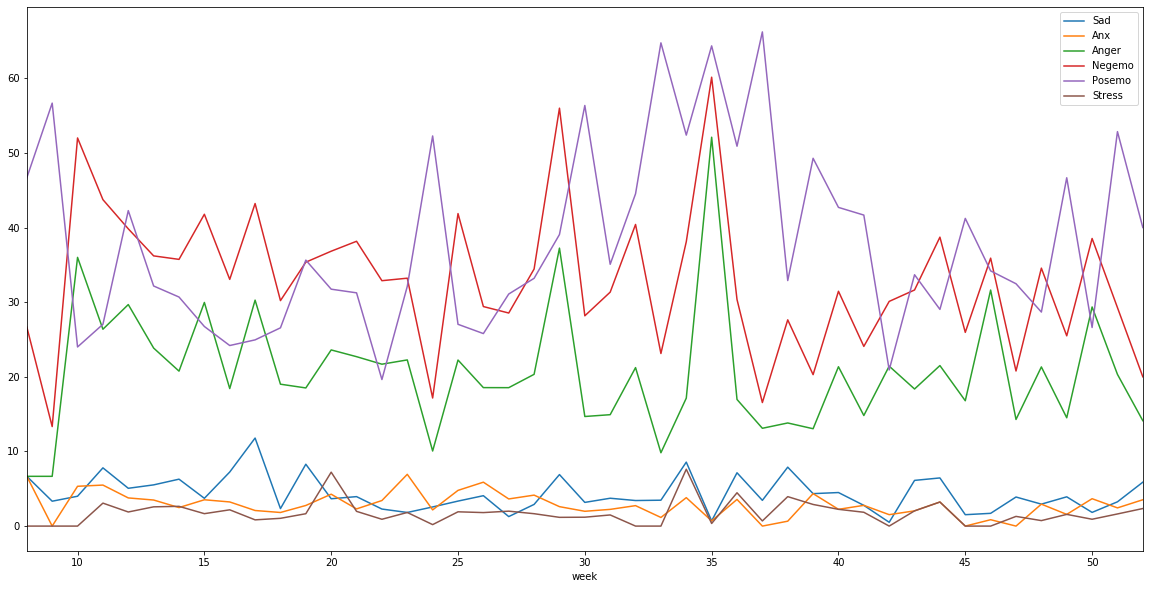

In [47]:
df_cate_week_2012.plot(figsize=(20,10))

In [48]:
df_cate_week_2012.corr()

,Sad,Anx,Anger,Negemo,Posemo,Stress
Sad,1.000000,0.165364,-0.068197,0.162059,-0.091039,0.431259
Anx,0.165364,1.000000,0.089103,0.276566,-0.362226,0.285242
Anger,-0.068197,0.089103,1.000000,0.896678,-0.248885,-0.069348
Negemo,0.162059,0.276566,0.896678,1.000000,-0.319450,0.075701
Posemo,-0.091039,-0.362226,-0.248885,-0.319450,1.000000,-0.063027
Stress,0.431259,0.285242,-0.069348,0.075701,-0.063027,1.000000


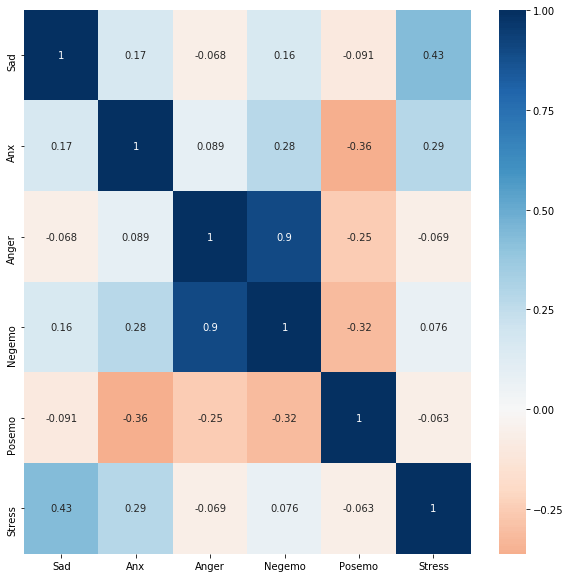

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(df_cate_week_2012.corr(),annot=True,center=0,cmap='RdBu')

### plot_fraction_trend
- df: the dataframe contains at least **message,week,tag cols**
- cate: the category of emotion e.g. anxiety='anx
- title: graph title
- xlabel: graph xlabel

In [50]:
df_all_week_2013 = pd.DataFrame(df_all_week_2013)
df_cate_week_2013 = df_cate_week_2013.join(df_all_week_2013)
df_cate_week_2013 = df_cate_week_2013.fillna(0)

In [51]:
for cate in  emotions:
    df_cate_week_2013[cate] = df_cate_week_2013[cate]/df_cate_week_2013['message']*100
df_cate_week_2013 = df_cate_week_2013.drop(columns='message')

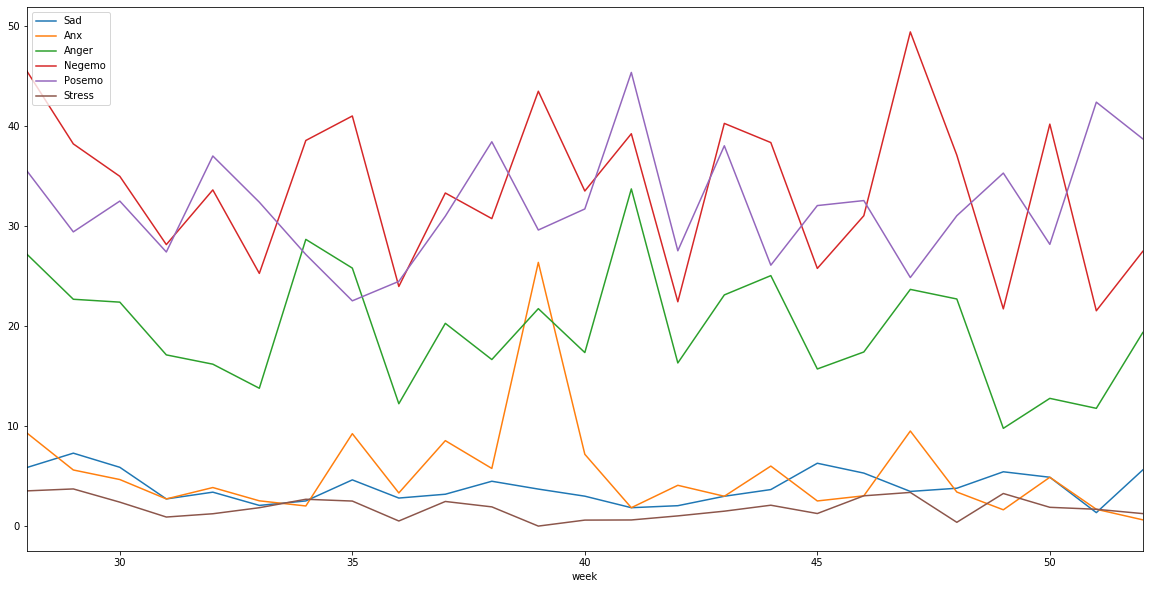

In [52]:
df_cate_week_2013.plot(figsize=(20,10))

In [53]:
df_cate_week_2013.corr()

,Sad,Anx,Anger,Negemo,Posemo,Stress
Sad,1.000000,0.068898,0.005775,0.170017,-0.084954,0.493958
Anx,0.068898,1.000000,0.215282,0.529682,-0.299107,-0.106314
Anger,0.005775,0.215282,1.000000,0.734474,0.013136,0.128187
Negemo,0.170017,0.529682,0.734474,1.000000,-0.207821,0.244325
Posemo,-0.084954,-0.299107,0.013136,-0.207821,1.000000,-0.132287
Stress,0.493958,-0.106314,0.128187,0.244325,-0.132287,1.000000


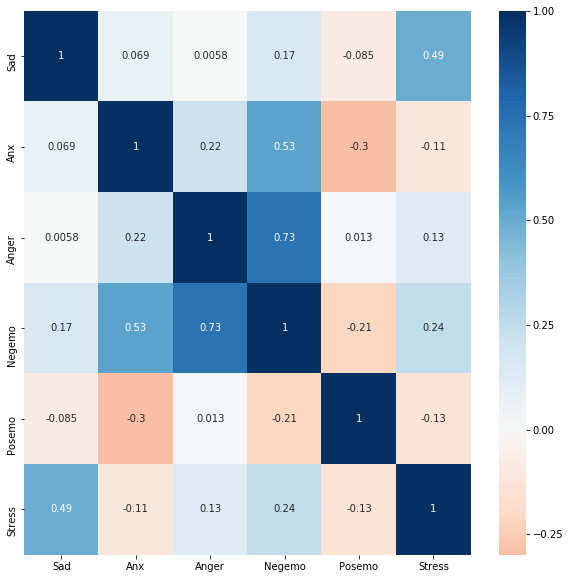

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(df_cate_week_2013.corr(),annot=True,center=0,cmap='RdBu')

## Plot emotions after events happened 90 days

Since most of the data is in week 8 to week 20, that is, about 90 days after events happening. We plot more plots in these days.

In [55]:
def plot_count_trend_days(df,category):
    df_category_week = pd.DataFrame()
    for cate in category:
        df_cate_week=df[df[cate]==cate].groupby('days_from_event')['message'].count()    
        df_cate_week = pd.DataFrame(df_cate_week)
        df_cate_week.columns = [cate]
        df_category_week = pd.concat([df_category_week,df_cate_week],axis = 1)
    plt.figure(figsize=(20,8))
    plt.xlabel('days after event',size=20)
    plt.ylabel('tweet num',size=20)
    # gca stands for 'get current axis'
    ax = plt.gca()
    df_category_week.plot(kind='line',ax=ax,fontsize=20)
    return df_category_week

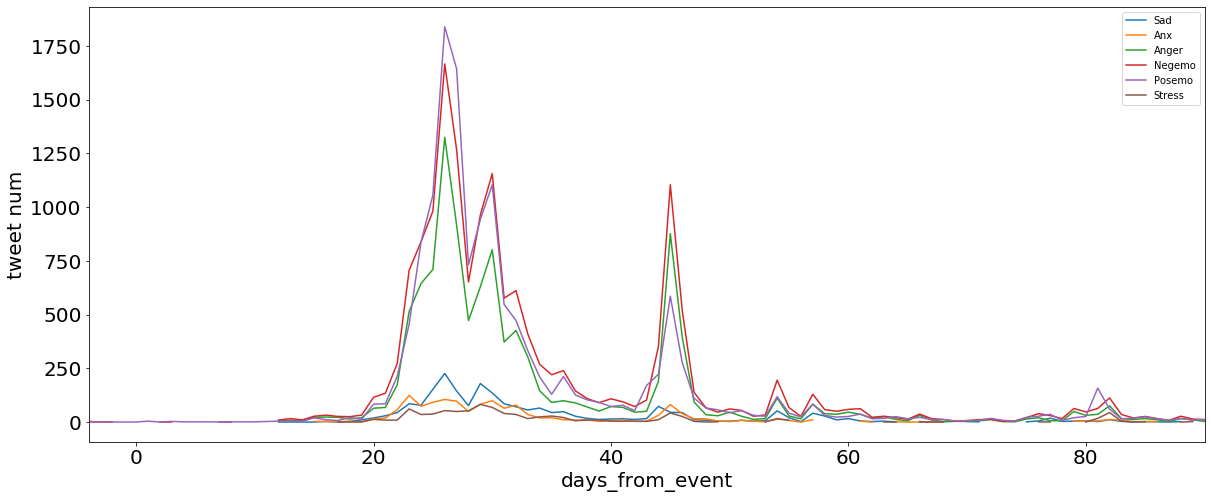

In [56]:
df_cate_days_narrow_2012 = plot_count_trend_days(data_msg_time2012.loc[(data_msg_time2012['days_from_event']<=90)],emotions)


In [57]:
df_all_days_2012 = data_msg_time2012.groupby('days_from_event')['message'].count()
df_all_days_2012 = pd.DataFrame(df_all_days_2012)
df_cate_days_narrow_2012 = df_cate_days_narrow_2012.join(df_all_days_2012)
df_cate_days_narrow_2012 = df_cate_days_narrow_2012.fillna(0)

In [58]:
for cate in  emotions:
    df_cate_days_narrow_2012[cate] = df_cate_days_narrow_2012[cate]/df_cate_days_narrow_2012['message']*100
df_cate_days_narrow_2012= df_cate_days_narrow_2012.drop(columns='message')

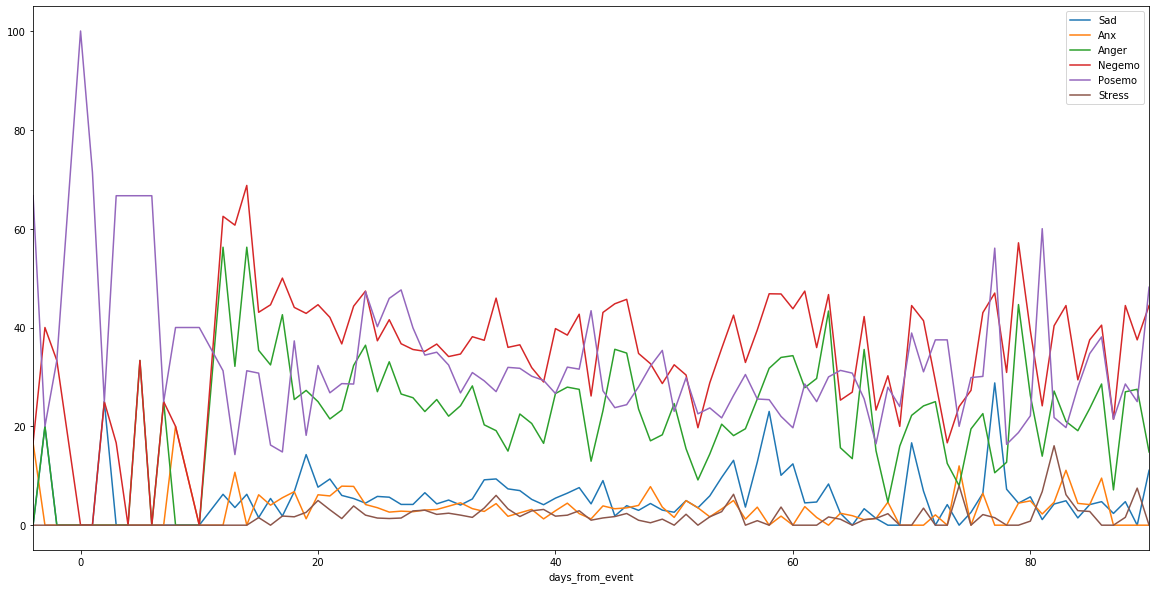

In [59]:
df_cate_days_narrow_2012.plot(figsize=(20,10))

In [60]:
df_cate_days_narrow_2012.corr()

,Sad,Anx,Anger,Negemo,Posemo,Stress
Sad,1.000000,-0.194020,0.134581,0.415404,-0.205185,0.004333
Anx,-0.194020,1.000000,-0.047160,0.106213,-0.103553,0.209479
Anger,0.134581,-0.047160,1.000000,0.830326,-0.421783,0.078038
Negemo,0.415404,0.106213,0.830326,1.000000,-0.530894,0.171009
Posemo,-0.205185,-0.103553,-0.421783,-0.530894,1.000000,-0.190422
Stress,0.004333,0.209479,0.078038,0.171009,-0.190422,1.000000


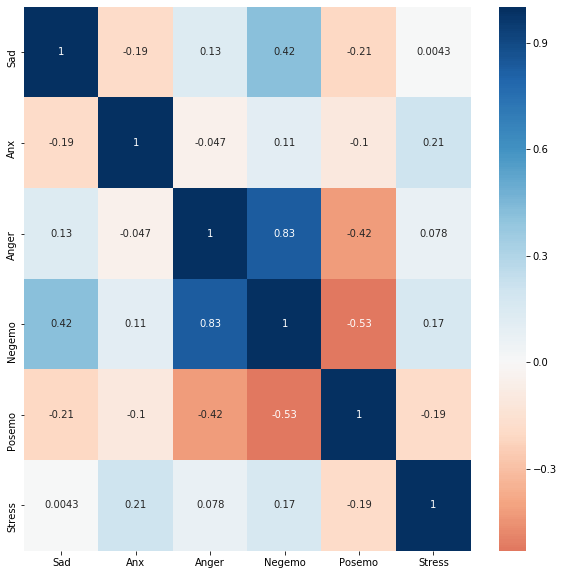

In [61]:
plt.figure(figsize=(10,10))
sns.heatmap(df_cate_days_narrow_2012.corr(),annot=True,center=0,cmap='RdBu')

## Plot emotions after events happened 90 days

To keep the same time period as that in 2012, we also plot more pictures for emotions after events happened 90 days.

In [62]:
def plot_count_trend_days(df,category):
    df_category_week = pd.DataFrame()
    for cate in category:
        df_cate_week=df[df[cate]==cate].groupby('days_from_event')['message'].count()    
        df_cate_week = pd.DataFrame(df_cate_week)
        df_cate_week.columns = [cate]
        df_category_week = pd.concat([df_category_week,df_cate_week],axis = 1)
    plt.figure(figsize=(20,8))
    plt.xlabel('days after event',size=20)
    plt.ylabel('tweet num',size=20)
    # gca stands for 'get current axis'
    ax = plt.gca()
    df_category_week.plot(kind='line',ax=ax,fontsize=20)
    return df_category_week

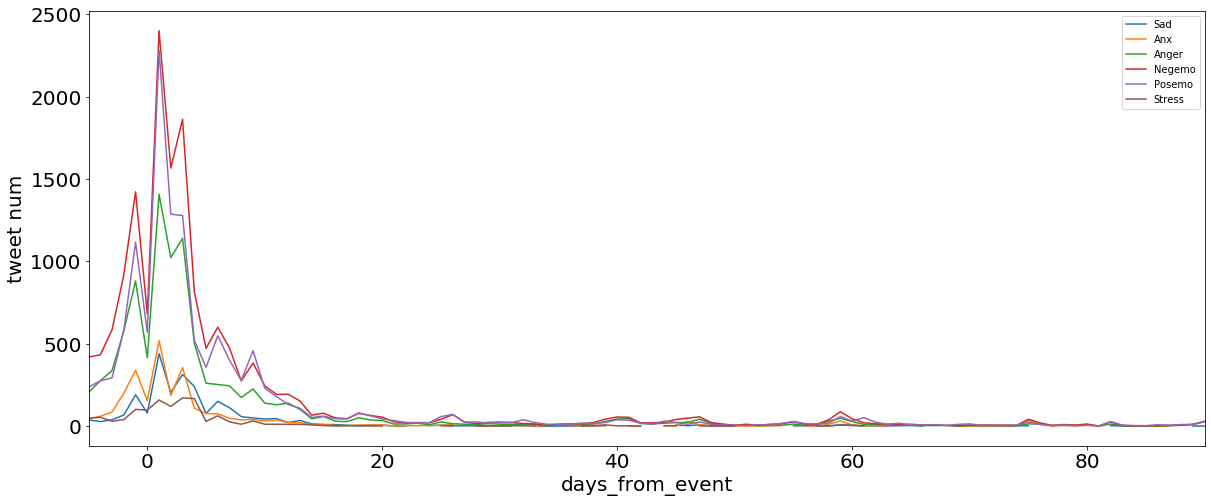

In [63]:
df_cate_days_narrow_2013 = plot_count_trend_days(data_msg_time2013.loc[(data_msg_time2013['days_from_event']>=-5)&(data_msg_time2013['days_from_event']<=90)],emotions)
#data begans before 5 days of event happening

In [64]:
df_all_days_2013 = data_msg_time2013.groupby('days_from_event')['message'].count()
df_all_days_2013 = pd.DataFrame(df_all_days_2013)
df_cate_days_narrow_2013 = df_cate_days_narrow_2013.join(df_all_days_2013)
df_cate_days_narrow_2013 = df_cate_days_narrow_2013.fillna(0)

In [65]:
for cate in  emotions:
    df_cate_days_narrow_2013[cate] = df_cate_days_narrow_2013[cate]/df_cate_days_narrow_2013['message']*100
df_cate_days_narrow_2013= df_cate_days_narrow_2013.drop(columns='message')

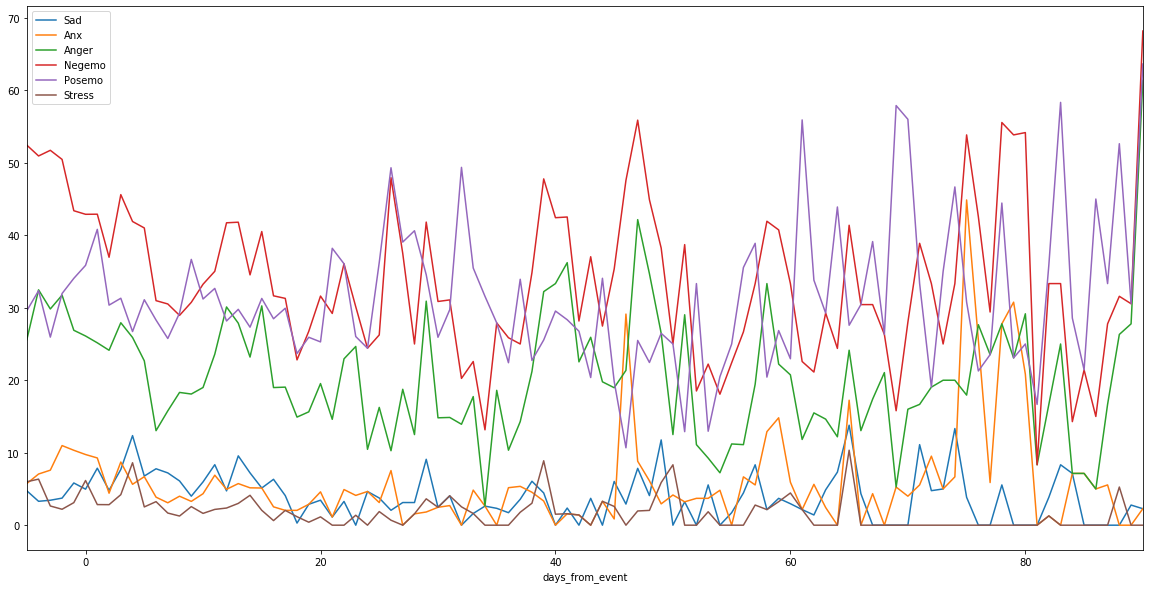

In [66]:
df_cate_days_narrow_2013.plot(figsize=(20,10))

In [67]:
df_cate_days_narrow_2013.corr()

,Sad,Anx,Anger,Negemo,Posemo,Stress
Sad,1.000000,0.029489,0.189619,0.275266,0.000564,0.380593
Anx,0.029489,1.000000,0.149619,0.498719,-0.169728,-0.027343
Anger,0.189619,0.149619,1.000000,0.813810,0.018397,0.275080
Negemo,0.275266,0.498719,0.813810,1.000000,-0.010214,0.282048
Posemo,0.000564,-0.169728,0.018397,-0.010214,1.000000,-0.082889
Stress,0.380593,-0.027343,0.275080,0.282048,-0.082889,1.000000


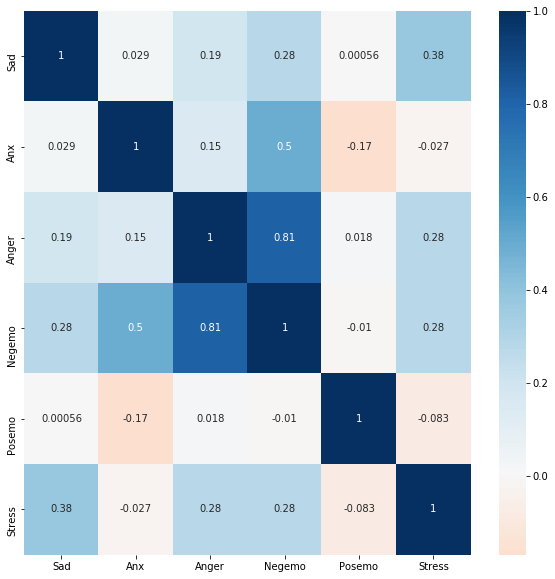

In [68]:
plt.figure(figsize=(10,10))
sns.heatmap(df_cate_days_narrow_2013.corr(),annot=True,center=0,cmap='RdBu')